# Module 4: Exercise material
AH2179-Exercise 4: Using the text classification model for traffic sentiment analysis

**Assignment task:** Find the best text classification model for the sentimental analysis (assignment submission)

Identify which vectorization method works the best or basically does not much difference.
Identify which model, together with its corresponding hyperparameters, gives the best performance for traffic sentimental analysis.  

Uses the Pandas and Scikit-learn libraries to create a word matrix from a list of strings.

In [94]:
#code from Exercise_4 tutorial

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Define the text
lines = [
    'The sun sets over the quiet meadow.',
    'Birds chirp softly in the early morning.',
    'A gentle breeze rustles the autumn leaves.',
    'Stars twinkle brightly in the clear night sky.'
]

# Creat the CountVectorizer instance, the stop_words parameter is set to "english"
# to remove common English stop words like "and", "the", and "a"
vectorizer = CountVectorizer(stop_words='english')

# Convert the text to vectorizer
word_matrix = vectorizer.fit_transform(lines)

# The get_feature_names_out method is used to get the feature names
# (i.e., the individual words) in the word matrix
feature_names = vectorizer.get_feature_names_out()

# The line_names list is created to store the names of each line in the original
# list of strings
line_names = [f'Line {(i + 1):d}' for i, _ in enumerate(word_matrix)]

# A Pandas DataFrame is created using the word_matrix.toarray() method to convert
# the sparse matrix to a dense array
df = pd.DataFrame(data=word_matrix.toarray(), index=line_names,columns=feature_names)

# The head() method is called on the resulting DataFrame to display the first few
# rows of the matrix
df.head()

,autumn,birds,breeze,brightly,chirp,clear,early,gentle,leaves,meadow,morning,night,quiet,rustles,sets,sky,softly,stars,sun,twinkle
Line 1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
Line 2,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
Line 3,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
Line 4,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1


#Part 4.1 - Develop the text classification model for the traffic sentiment analysis

Two columns in data set:  'Text' column encompasses sentiments related to Pakistani traffic (positive and negative). 'Sentiment' column categorizes each sentiment, positive reviews = '0' and negative reviews = '1'.

Sentiment analysis is modeled as a binary classification problem.



**Load dataset**

In [95]:
#code from Exercise_4 tutorial


import pandas as pd
import os

# The path of the dataset
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'

# Load the data use the pandas
df = pd.read_csv(url)

# Display the data
df.head()

,Text,Sentiment
0,Adayala road is clear,0
1,Traffic jam from parbat rd to nazim-ud-din rd ...,1
2,Mandra is clear,0
3,Fort street is clear,0
4,"Mashriq Hotel towards Fawara Chowk, City Sadda...",1


**Use wordcloud to visualize the dataset**

**Print summary of dataset**

In [97]:
#code from tutorial

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       2109 non-null   object
 1   Sentiment  2109 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 33.1+ KB


**To see how many instances of each class (0 for positive and 1 for negative):**

In [98]:
#code from tutorial

# Displaying the instances of each class
df.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1010   1008                   Traffic open at shahrah e faisal    2
1          1099   1079  Road is closed for traffic at star gate toward...    3

Dataset has duplicate rows,could bias a ML model. code bellow delete the duplicate rows

In [99]:
#code from tutorial

# Delete the duplicate rows
df = df.drop_duplicates()

# Displaying the instances of each class
df.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1008   1008                              Adayala road is clear    1
1          1079   1079  Traffic jam from parbat rd to nazim-ud-din rd ...    1

**CountVectorizer to prepare and vectorize the text in the Text column:**

In [100]:
#code from tutorial

# Convert the text to vectorizer
x = df['Text']

# Obtain the label
y = df['Sentiment']

 Split dataset for training and testing. 80/20 split  (ca 2,000 samples in total)

# Train classifier
Scikit’s LogisticRegression class, which uses logistic regression to fit a model to the data

"Validate the trained model with the 20% of the dataset set aside for testing and show the results in a confusion matrix and accuracy:" - tutorial

radera

Analyzing text to see what sentiment

radera

#Exercise - Assignment task-Find the best text classification model for the sentimental analysis (assignment submission)

"The tasks for this part is use the grid search to:

* Identify which vectorization method works the best or basically not much difference.
* Identify which model, together with its corresponding hyperparameters, gives the best performance for traffic sentimental analysis." - tutorial

Test both different vectorizations and different classifications (machine learning) at the same time to find wich one is the best

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
The accuracy of the model is: 0.9712918660287081


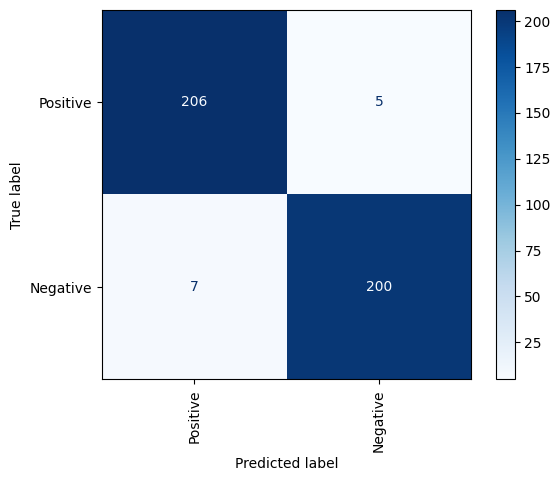

In [130]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import HashingVectorizer #added this line to import hashingvectorizer


#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

#(1) CountVectorizer
#vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)

#(2) #HashingVectorizer
vectorizer = HashingVectorizer(ngram_range=(1, 2), n_features=200)

#(3)TfidfVectorizer
'''
vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
    )
    '''

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

# split into train/test set
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# apply the vectorizers
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# here you can try use the grid search to find the best model parameter(a example is in SVM model)
#-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
#(1)LR
'''
model = LogisticRegression(max_iter=1000, random_state=0)
param_grid = {
     'C': [0.001, 0.01, 0.1, 1, 10, 100],
 }
 '''

#(2)KNN
'''
model=KNeighborsClassifier()
param_grid = {
     'n_neighbors': [3, 5, 7, 9],
     'weights': ['uniform', 'distance']
 }
 '''

#(3)RF
#'''
model = RandomForestClassifier(random_state=0)
param_grid = {
     'n_estimators': [100, 200, 300],
     'max_depth': [None, 10, 20, 30],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4]
 }
 #'''

#(4)XGBoost
'''
model =  XGBClassifier()
param_grid = {
     'learning_rate': [0.01, 0.1, 0.2],
     'n_estimators': [100, 200, 300],
     'max_depth': [3, 4, 5]
 }
 '''


#(5)SVM
'''
model= SVC(probability=True)

# this is an example to use the grid search to find the best parameter for SVM model
# param_grid specifies the hyperparameter grid to search over： kernel types
# ('linear', 'rbf', 'poly') and regularization strength C values（0.1, 1, 10）.
param_grid = {'kernel': ['linear', 'rbf', 'poly'],'C': [0.1, 1, 10]}

#`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

#`fit` method fits the model to the training data, systematically trying out all
# parameter combinations.
grid_search.fit(x_train_vectorized, y_train)

#`best_params` and `best_score` store the best hyperparameters and their
# corresponding accuracy score.
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

#The `model` is updated with the best estimator found during the grid search,
# which can be used for further analysis.
model = grid_search.best_estimator_
'''

#(6)Naïve Bayes models
'''
model=BernoulliNB()
param_grid = {'alpha': [0.1, 0.5, 1],'force_alpha': [True,False]}
'''

#_______________________________________________________________________________________________________________
#`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

#`fit` method fits the model to the training data, systematically trying out all
# parameter combinations.
grid_search.fit(x_train_vectorized, y_train)

#`best_params` and `best_score` store the best hyperparameters and their
# corresponding accuracy score.
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

#The `model` is updated with the best estimator found during the grid search,
# which can be used for further analysis.
model = grid_search.best_estimator_
#_______________________________________________________________________________________________________________

#-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

cmd.from_estimator(
    model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
    )

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))

#Results
I systematiccaly manually test each vectorization with every grid serach

1.1<br>
Vectorization: CountVectorizer<br>
Grid search (to find the best model parameter): LogisticRegression<br>
{'C': 1}<br>
Model accuracy: 0.937799043062201<br>
Time:1 s<br>

1.2<br>
Vectorization: CountVectorizer<br>
Grid search (to find the best model parameter): KNeighborsClassifier<br>
{'n_neighbors': 5, 'weights': 'uniform'}<br>
Model accuracy: 0.9473684210526315<br>
Time:1 s<br>

1.3<br>

Vectorization: CountVectorizer<br>
Grid search (to find the best model parameter): RandomForestClassifier<br>
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}<br>
Model accuracy: 0.9641148325358851<br>
Time: 4 m 47 s<br>

1.4<br>
Vectorization: CountVectorizer<br>
Grid search (to find the best model parameter): XGBClassifier <br>
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}<br>
Model accuracy: 0.9593301435406698<br>
Time: 15s<br>

1.5<br>
Vectorization: CountVectorizer<br>
Grid search (to find the best model parameter): SVM<br>
{'C': 10, 'kernel': 'rbf'}<br>
Model accuracy: 0.9569377990430622<br>
Time:14 s<br>

1.6<br>
Vectorization: CountVectorizer<br>
Grid search (to find the best model parameter): Naïve Bayes models <br>
{'alpha': 1, 'force_alpha': True}<br>
Model accuracy: 0.9425837320574163<br>
Time: 0 s<br>

<br>
2.1<br>
Vectorization: HashingVectorize<br>
Grid search (to find the best model parameter): LogisticRegression <br>
{'C': 10}<br>
Model accuracy: 0.9521531100478469<br>
Time: s<br>

2.2<br>
Vectorization: HashingVectorize<br>
Grid search (to find the best model parameter): KNeighborsClassifier <br>
{'n_neighbors': 9, 'weights': 'uniform'}<br>
Model accuracy: 0.9545454545454546<br>
Time: 12 s<br>

2.3<br>
Vectorization: HashingVectorize<br>
Grid search (to find the best model parameter):RandomForestClassifier <br>
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
<br>
Model accuracy:0.9712918660287081<br>
Time: 7 m 11 s<br>

2.4<br>
Vectorization: HashingVectorize<br>
Grid search (to find the best model parameter):XGBClassifier <br>
{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}<br>
Model accuracy: 0.9712918660287081<br>
Time: 1m 24s<br>

2.5<br>
Vectorization: HashingVectorizer<br>
Grid search (to find the best model parameter): SVM<br>
{'C': 10, 'kernel': 'rbf'}
Model accuracy: 0.9712918660287081<br>
Time:1m 2 s<br>

2.6<br>
Vectorization: HashingVectorize<br>
Grid search (to find the best model parameter): Naïve Bayes models <br>
{'alpha': 1, 'force_alpha': True}<br>
Model accuracy: 0.8349282296650717<br>
Time: 1 s<br>

<br>
3.1<br>
Vectorization: TfidfVectorizer<br>
Grid search (to find the best model parameter): LogisticRegression <br>
{'C': 0.1}<br>
Model accuracy: 0.9545454545454546<br>
Time: 3 s<br>

3.2<br>
Vectorization: TfidfVectorizer<br>
Grid search (to find the best model parameter): KNeighborsClassifier<br>
{'n_neighbors': 5, 'weights': 'distance'}<br>
Model accuracy: 0.9330143540669856 <br>
Time:5 s<br>

3.3<br>
Vectorization: TfidfVectorizer<br>
Grid search (to find the best model parameter): RandomForestClassifier <br>
{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
<br>
Model accuracy: 0.9712918660287081<br>
Time: 5m 28 ss<br>

3.4<br>
Vectorization: TfidfVectorizer<br>
Grid search (to find the best model parameter): XGBClassifier <br>
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}<br>
Model accuracy: 0.9712918660287081<br>
Time: 47 s<br>

3.5<br>
Vectorization: TfidfVectorizer<br>
Grid search (to find the best model parameter): SVM<br>
{'C': 0.1, 'kernel': 'rbf'}<br>
Model accuracy: 0.9593301435406698<br>
Time:18 s<br>

3.6<br>
Vectorization: TfidfVectorizer<br>
Grid search (to find the best model parameter): Naïve Bayes models<br>
{'alpha': 1, 'force_alpha': True}<br>
Model accuracy: 0.9401913875598086<br>
Time: 0 s<br>



